In [3]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 45.3 MB/s eta 0:00:00:00:01
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 38.4 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.1.0
    Uninstalling setuptools-75.1.0:
      Successfully uninstalled setuptools-75.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-gbq 0.25.0 requires google-api-core<3.0.0dev,>=2.10.2, but you have google-api-core 1.34.1 which is incompatible.
tensorflow-decision-forests 1.10.0 requires tensorflow==2.17.0, but you have tensorflow 2.17.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 122.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) 

In [4]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [5]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("/kaggle/input/bike-sharing-demand/train.csv", parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("/kaggle/input/bike-sharing-demand/test.csv", parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [7]:
# Same thing as train and test dataset
submission = pd.read_csv("/kaggle/input/bike-sharing-demand/sampleSubmission.csv", parse_dates=['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


**Train a model using AutoGluon’s Tabular Prediction**

In [8]:
## Requirements:
# We are prediting count, so it is the label we are setting.
# Ignore 'casual' and 'registered' columns as they are also not present in the test dataset.
# Use the root_mean_squared_error as the metric to use for evaluation.
# Set a time limit of 10 minutes (600 seconds).
# Use the preset best_quality to focus on creating the best model.
train_data = train.drop(columns=['casual', 'registered'])

# Train AutoGluon model
predictor = TabularPredictor(label="count", eval_metric="root_mean_squared_error").fit(
    train_data, 
    time_limit=600,  # 10 minutes
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20250306_152641"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Nov 10 10:07:59 UTC 2024
CPU Count:          4
Memory Avail:       28.70 GB / 31.35 GB (91.5%)
Disk Space Avail:   19.16 GB / 19.52 GB (98.1%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fi

(_ray_fit pid=1399) [1000]	valid_set's rmse: 130.657
(_ray_fit pid=1522) [1000]	valid_set's rmse: 69.7959 [repeated 6x across cluster]
(_ray_fit pid=1622) [1000]	valid_set's rmse: 137.712 [repeated 7x across cluster]
(_ray_fit pid=1589) [8000]	valid_set's rmse: 132.379 [repeated 18x across cluster]


(_dystack pid=1353) 	-131.9758	 = Validation score   (-root_mean_squared_error) [repeated 3x across cluster]
(_dystack pid=1353) 	23.46s	 = Training   runtime [repeated 3x across cluster]
(_dystack pid=1353) 	10.99s	 = Validation runtime [repeated 3x across cluster]
(_dystack pid=1353) Fitting model: LightGBM_BAG_L1 ... Training model for up to 67.12s of the 117.11s of remaining time. [repeated 4x across cluster]
(_dystack pid=1353) Fitting 108 L1 models, fit_strategy="sequential" ...
(_dystack pid=1353) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.03%) [repeated 2x across cluster]


(_ray_fit pid=1697) [1000]	valid_set's rmse: 71.1953 [repeated 7x across cluster]
(_ray_fit pid=1826) [1000]	valid_set's rmse: 129.274 [repeated 4x across cluster]
(_ray_fit pid=1958) [1000]	valid_set's rmse: 124.896 [repeated 3x across cluster]
(_ray_fit pid=2094) [1000]	valid_set's rmse: 136.511 [repeated 4x across cluster]


(_dystack pid=1353) 	-131.8496	 = Validation score   (-root_mean_squared_error)
(_dystack pid=1353) 	17.57s	 = Training   runtime
(_dystack pid=1353) 	0.77s	 = Validation runtime
(_dystack pid=1353) Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 44.15s of the 94.15s of remaining time.


(_ray_fit pid=2159) [2000]	valid_set's rmse: 74.1402 [repeated 3x across cluster]


(_dystack pid=255) 	-73.6122	 = Validation score   (-root_mean_squared_error)
(_dystack pid=255) 	50.78s	 = Training   runtime
(_dystack pid=255) 	1.14s	 = Validation runtime
(_dystack pid=255) Fitting model: WeightedEnsemble_L3 ... Training model for up to 145.76s of the -30.59s of remaining time.
(_dystack pid=255) 	Ensemble Weights: {'LightGBMXT_BAG_L2': 0.96, 'KNeighborsDist_BAG_L1': 0.04}
(_dystack pid=255) 	-73.5916	 = Validation score   (-root_mean_squared_error)
(_dystack pid=255) 	0.04s	 = Training   runtime
(_dystack pid=255) 	0.0s	 = Validation runtime
(_dystack pid=255) AutoGluon training complete, total runtime = 176.47s ... Best model: WeightedEnsemble_L3 | Estimated inference throughput: 126.7 rows/s (1210 batch size)
(_dystack pid=255) TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/kaggle/working/AutogluonModels/ag-20250306_152534/ds_sub_fit/sub_fit_ho")
(_dystack pid=1353) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFold

(_ray_fit pid=2583) [1000]	valid_set's rmse: 78.5071
(_ray_fit pid=2582) [1000]	valid_set's rmse: 70.2748
(_ray_fit pid=2713) [1000]	valid_set's rmse: 76.0678 [repeated 4x across cluster]


(_dystack pid=1353) 	-73.9497	 = Validation score   (-root_mean_squared_error)
(_dystack pid=1353) 	20.54s	 = Training   runtime
(_dystack pid=1353) 	1.75s	 = Validation runtime
(_dystack pid=1353) Fitting model: LightGBM_BAG_L2 ... Training model for up to 22.16s of the 22.14s of remaining time.
(_dystack pid=1353) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.04%)
(_ray_fit pid=2479) 	Ran out of time, early stopping on iteration 3538.
(_dystack pid=1353) 	-67.9088	 = Validation score   (-root_mean_squared_error)
(_dystack pid=1353) 	10.17s	 = Training   runtime
(_dystack pid=1353) 	0.15s	 = Validation runtime
(_dystack pid=1353) Fitting model: RandomForestMSE_BAG_L2 ... Training model for up to 8.14s of the 8.12s of remaining time.
(_dystack pid=1353) 	-66.522	 = Validation score   (-root_mean_squared_error)
(_dystack pid=1353) 	10.1s	 = Training   runtime
(_dystack pid=1353) 	0.56s	 = Validation runtim

In [9]:
# Review AutoGluon's training run with ranking of models that did the best.
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.804756  root_mean_squared_error      10.611744  264.915880                0.000905           0.073055            3       True         17
1   RandomForestMSE_BAG_L2  -53.354489  root_mean_squared_error       9.453912  246.893695                0.912869          16.617994            2       True         13
2     ExtraTreesMSE_BAG_L2  -53.930900  root_mean_squared_error       9.422472  235.483627                0.881430           5.207926            2       True         15
3          LightGBM_BAG_L2  -54.940763  root_mean_squared_error       8.816540  243.016905                0.275498          12.741204            2       True         12
4          CatBoost_BAG_L2  -55.929102  root_mean_squared_error       8.591028  272.062653   

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.561181655

In [10]:
# Generate predictions on the test dataset
predictions = predictor.predict(test)

# Display the first few predictions
predictions.head()

0    23.160156
1    41.592751
2    45.961075
3    49.576679
4    51.356163
Name: count, dtype: float32

In [11]:
predictions.describe()

count    6493.000000
mean      100.307503
std        89.785927
min         3.108558
25%        20.790936
50%        63.839035
75%       169.539429
max       363.916290
Name: count, dtype: float64

No negative values

In [12]:
# Create a submission DataFrame
submission = pd.DataFrame({
    "datetime": test["datetime"],  # Use the datetime from the test dataset
    "count": predictions           # Use our predicted values
})

# Display the first few rows
submission.head()

,datetime,count
0,2011-01-20 00:00:00,23.160156
1,2011-01-20 01:00:00,41.592751
2,2011-01-20 02:00:00,45.961075
3,2011-01-20 03:00:00,49.576679
4,2011-01-20 04:00:00,51.356163


In [13]:
# Save submission to a CSV file (without the index column)
submission.to_csv("/kaggle/working/submission.csv", index=False)

In [19]:
from kaggle_secrets import UserSecretsClient
import os

user_secrets = UserSecretsClient() 
os.environ['KAGGLE_USERNAME'] = user_secrets.get_secret("kaggle_username")
os.environ['KAGGLE_KEY'] = user_secrets.get_secret("kaggle_key")

In [20]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 992kB/s]
Successfully submitted to Bike Sharing Demand

In [21]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName            date                 description                              status    publicScore  privateScore  
------------------  -------------------  ---------------------------------------  --------  -----------  ------------  
submission.csv      2025-03-06 15:52:18  first raw submission                     complete  1.80761      1.80761       
submission_1.csv    2025-03-06 15:41:39                                           complete  1.80761      1.80761       
submission.csv      2025-03-06 14:59:35                                           complete  0.48817      0.48817       
submission.csv      2025-03-06 13:24:30                                           complete  0.44903      0.44903       


**Exploratory Data Analysis and Creating an additional feature**

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

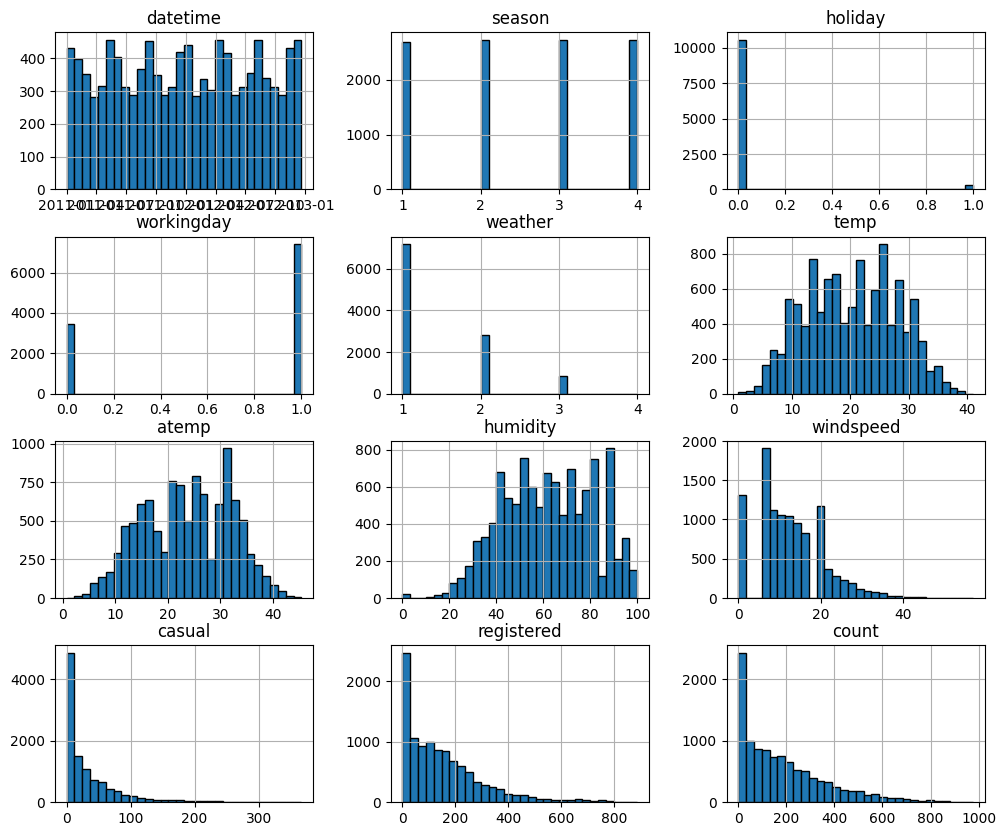

In [8]:
# Plot histograms for all numerical features in the training dataset
train.hist(figsize=(12, 10), bins=30, edgecolor='black')

In [9]:
# Feature engineering
for df in [train, test]:
    df["hour"] = df["datetime"].dt.hour
    df["day"] = df["datetime"].dt.day
    df["month"] = df["datetime"].dt.month
    df["dayofweek"] = df["datetime"].dt.dayofweek
    df["year"] = df["datetime"].dt.year
    df["season"] = df["season"].astype("category")
    df["weather"] = df["weather"].astype("category")

In [10]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,dayofweek,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1,5,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,5,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1,5,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1,5,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1,5,2011


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'dayofweek'}>,
        <Axes: title={'center': 'year'}>, <Axes: >]], dtype=object)

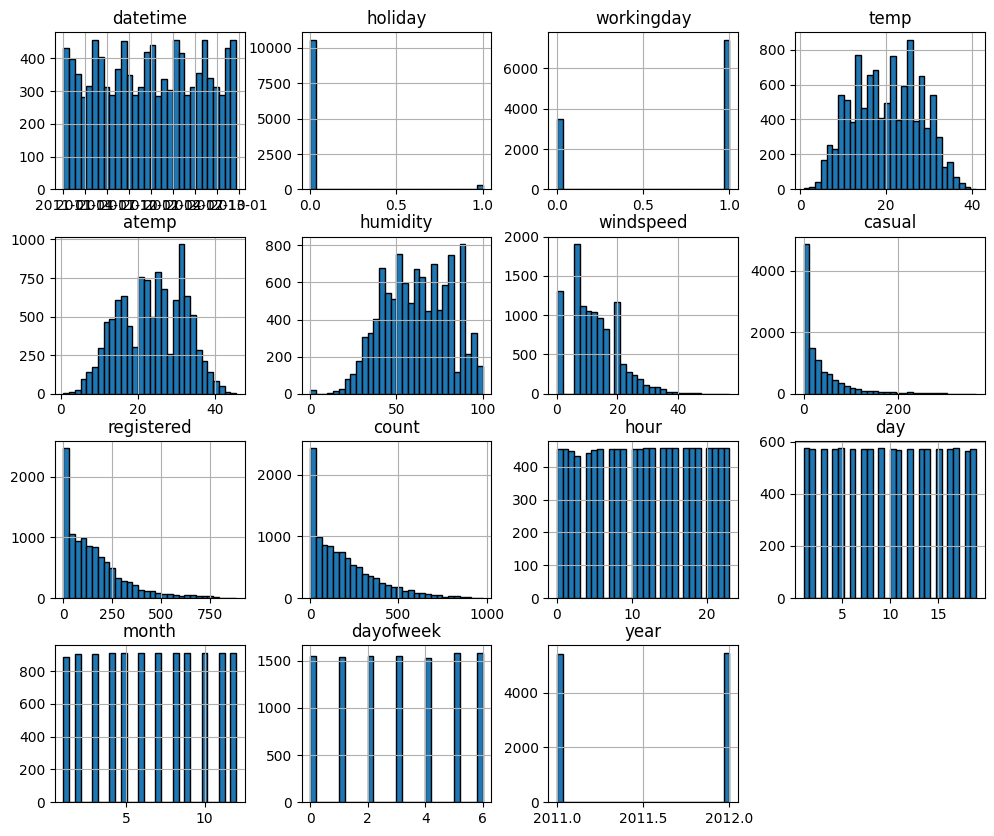

In [11]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(12, 10), bins=30, edgecolor='black')

**Rerun the model with the same settings as before, just with more features**

In [12]:
# Drop unnecessary columns before training
train_data = train.drop(columns=['casual', 'registered'])

# Retrain the AutoGluon model with the new features
predictor_new_features = TabularPredictor(label="count", eval_metric="root_mean_squared_error").fit(
    train_data, 
    time_limit=600,  # 10 minutes
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20250306_173934"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Nov 10 10:07:59 UTC 2024
CPU Count:          4
Memory Avail:       30.06 GB / 31.35 GB (95.9%)
Disk Space Avail:   19.50 GB / 19.52 GB (99.9%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fi

(_ray_fit pid=474) [1000]	valid_set's rmse: 36.7471
(_ray_fit pid=473) [4000]	valid_set's rmse: 36.2338 [repeated 12x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(_ray_fit pid=473) [7000]	valid_set's rmse: 36.1712 [repeated 11x across cluster]
(_ray_fit pid=475) [10000]	valid_set's rmse: 35.5513 [repeated 6x across cluster]
(_ray_fit pid=610) [3000]	valid_set's rmse: 34.286 [repeated 3x across cluster]
(_ray_fit pid=643) [2000]	valid_set's rmse: 36.3102 [repeated 5x across cluster]
(_ray_fit pid=710) [1000]	valid_set's rmse: 37.5544 [repeated 8x across cluster]
(_ray_fit pid=710) [4000]	valid_set's rmse: 35.1692 [repeated 7x across cluster]
(_ray_fit pid=710) [8000]	valid_set's rmse: 35.1633 [repeated 4x across cluster]


(_dystack pid=277) 	-35.3619	 = Validation score   (-root_mean_squared_error)
(_dystack pid=277) 	54.41s	 = Training   runtime
(_dystack pid=277) 	16.48s	 = Validation runtime
(_dystack pid=277) Fitting model: LightGBM_BAG_L1 ... Training model for up to 29.78s of the 77.43s of remaining time.
(_dystack pid=277) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.02%)


(_ray_fit pid=751) [1000]	valid_set's rmse: 35.8674
(_ray_fit pid=753) [1000]	valid_set's rmse: 35.3382
(_ray_fit pid=885) [1000]	valid_set's rmse: 33.7138 [repeated 4x across cluster]
(_ray_fit pid=980) [1000]	valid_set's rmse: 32.9476 [repeated 6x across cluster]


(_dystack pid=277) 	-34.3145	 = Validation score   (-root_mean_squared_error)
(_dystack pid=277) 	20.35s	 = Training   runtime
(_dystack pid=277) 	2.29s	 = Validation runtime
(_dystack pid=277) Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 5.50s of the 53.15s of remaining time.
(_dystack pid=277) 	-38.8998	 = Validation score   (-root_mean_squared_error)
(_dystack pid=277) 	8.8s	 = Training   runtime
(_dystack pid=277) 	0.64s	 = Validation runtime
(_dystack pid=277) Fitting model: WeightedEnsemble_L2 ... Training model for up to 142.93s of the 43.18s of remaining time.
(_dystack pid=277) 	Ensemble Weights: {'LightGBM_BAG_L1': 0.44, 'LightGBMXT_BAG_L1': 0.36, 'RandomForestMSE_BAG_L1': 0.2}
(_dystack pid=277) 	-33.0038	 = Validation score   (-root_mean_squared_error)
(_dystack pid=277) 	0.02s	 = Training   runtime
(_dystack pid=277) 	0.0s	 = Validation runtime
(_dystack pid=277) Fitting 106 L2 models, fit_strategy="sequential" ...
(_dystack pid=277) Fitting model: Li

In [25]:
# Review AutoGluon's training run with ranking of models that did the best.
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.081911  root_mean_squared_error      23.978525  357.688050                0.000827           0.035251            3       True         14
1          CatBoost_BAG_L2  -30.371789  root_mean_squared_error      22.500906  325.791981                0.135135          49.165258            2       True         13
2          LightGBM_BAG_L2  -30.457788  root_mean_squared_error      22.742330  291.025880                0.376559          14.399157            2       True         11
3        LightGBMXT_BAG_L2  -30.963345  root_mean_squared_error      23.466003  294.088384                1.100233          17.461661            2       True         10
4   RandomForestMSE_BAG_L2  -31.603359  root_mean_squared_error      23.070407  300.858577   

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.56118165528414,
  'KNeighborsDist_BAG_L1': -84.13501071997395,
  'LightGBMXT_BAG_L1': -34.469799413551534,
  'LightGBM_BAG_L1': -33.91733776595802,
  'RandomForestMSE_BAG_L1': -38.43

In [15]:
# Generate predictions on the test dataset
predictions = predictor_new_features.predict(test)

# Display the first few predictions
predictions.head()

0    14.917723
1    10.405802
2     9.536554
3     8.221344
4     7.010201
Name: count, dtype: float32

In [16]:
predictions.describe()

count    6493.000000
mean      153.485016
std       130.846085
min         1.256022
25%        54.725925
50%       120.218460
75%       217.456268
max       812.804688
Name: count, dtype: float64

In [17]:
# Create a submission DataFrame
submission = pd.DataFrame({
    "datetime": test["datetime"],  # Use the datetime from the test dataset
    "count": predictions           # Use our predicted values
})

# Display the first few rows
submission.head()

,datetime,count
0,2011-01-20 00:00:00,14.917723
1,2011-01-20 01:00:00,10.405802
2,2011-01-20 02:00:00,9.536554
3,2011-01-20 03:00:00,8.221344
4,2011-01-20 04:00:00,7.010201


In [19]:
# Save submission to a CSV file (without the index column)
submission.to_csv("/kaggle/working/submission_2.csv", index=False)

In [20]:
from kaggle_secrets import UserSecretsClient
import os

user_secrets = UserSecretsClient() 
os.environ['KAGGLE_USERNAME'] = user_secrets.get_secret("kaggle_username")
os.environ['KAGGLE_KEY'] = user_secrets.get_secret("kaggle_key")

In [21]:
!kaggle competitions submit -c bike-sharing-demand -f submission_2.csv -m "second submission"

100%|█████████████████████████████████████████| 188k/188k [00:01<00:00, 182kB/s]
Successfully submitted to Bike Sharing Demand

In [22]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName            date                 description                              status    publicScore  privateScore  
------------------  -------------------  ---------------------------------------  --------  -----------  ------------  
submission_2.csv    2025-03-06 18:00:59  second submission                        complete  0.68155      0.68155       
submission.csv      2025-03-06 15:52:18  first raw submission                     complete  1.80761      1.80761       
submission_1.csv    2025-03-06 15:41:39                                           complete  1.80761      1.80761       
submission.csv      2025-03-06 14:59:35                                           complete  0.48817      0.48817       


**Hyper parameter optimization**

In [23]:
# Drop unnecessary columns before training
train_data = train.drop(columns=['casual', 'registered'])

# Define hyperparameters for individual models
hyperparameters = {
    "GBM": {"num_boost_round": 100},  # LightGBM with max 100 boosting rounds
    "XGB": {"n_estimators": 100, "learning_rate": 0.05},  # XGBoost with 100 trees and a lower LR
    "CAT": {"iterations": 200},  # CatBoost with 200 iterations
    "NN_TORCH": {"num_epochs": 20}  # Neural Network with 20 epochs
}

# Define hyperparameter tuning settings
hyperparameter_tune_kwargs = {
    "num_trials": 10,  # Try 10 different configurations
    "scheduler": "local",  # Run tuning locally
    "searcher": "bayes"  # Use Bayesian Optimization
}

# Train the AutoGluon model with hyperparameter tuning
predictor_new_hpo = TabularPredictor(label="count", eval_metric="root_mean_squared_error").fit(
    train_data,
    time_limit=1200,  # Increase training time to 20 minutes for better tuning
    presets="best_quality",
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
)

2025-03-06 18:23:15,476	INFO timeout.py:54 -- Reached timeout of 88.4616801738739 seconds. Stopping all trials.
2025-03-06 18:23:15,495	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/kaggle/working/AutogluonModels/ag-20250306_180427/models/NeuralNetTorch_BAG_L2' in 0.0130s.
2025-03-06 18:23:23,918	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 3 trial(s):
- c6bbe0eb: FileNotFoundError('Could not fetch metrics for c6bbe0eb: both result.json and progress.csv were not found at /kaggle/working/AutogluonModels/ag-20250306_180427/models/NeuralNetTorch_BAG_L2/c6bbe0eb')
- 955310fd: FileNotFoundError('Could not fetch metrics for 955310fd: both result.json and progress.csv were not found at /kaggle/working/AutogluonModels/ag-20250306_180427/models/NeuralNetTorch_BAG_L2/955310fd')
- c6e63c2f: FileNotFoundError('Could not fetch metrics for c6e63c2f: both result.json and progress.csv were not found at /kaggle/working/AutogluonModels/a

In [26]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                             model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0              WeightedEnsemble_L3  -34.542211  root_mean_squared_error       4.677313  411.707718                0.001256           0.071554            3       True         45
1              WeightedEnsemble_L2  -34.828138  root_mean_squared_error       0.824452   43.073838                0.000947           0.041156            2       True         29
2                XGBoost_BAG_L2/T5  -34.889985  root_mean_squared_error       3.522770  315.973565                0.303635          12.570235            2       True         42
3                XGBoost_BAG_L2/T6  -34.939021  root_mean_squared_error       3.533460  315.369525                0.314325          11.966195            2       True         43
4                XGBoost_BAG_L2/T4  -35.101596  root_

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T5': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T6': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T7': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T8': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T9': 'StackerEnsembleModel_LGB',
  'CatBoost_BAG_L1/T1': 'StackerEnsembleModel_CatBoost',
  'CatBoost_BAG_L1/T2': 'StackerEnsembleModel_CatBoost',
  'CatBoost_BAG_L1/T3': 'StackerEnsembleModel_CatBoost',
  'CatBoost_BAG_L1/T4': 'StackerEnsembleModel_CatBoost',
  'CatBoost_BAG_L1/T5': 'StackerEnsembleModel_CatBoost',
  'CatBoost_BAG_L1/T6': 'StackerEnsembleModel_CatBoost',
  'CatBoost_BAG_L1/T7': 'StackerEnsembleModel_CatBoost',
  'XGBoost_BAG_L1/T1': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1/T2': 'StackerEnsembleModel_XGBoost',
  'XGBoo

In [27]:
# Refit the best model on the full dataset
predictor_new_hpo.refit_full()

Refitting models via `predictor.refit_full` using all of the data (combined train and validation)...
	Models trained in this way will have the suffix "_FULL" and have NaN validation score.
	This process is not bound by time_limit, but should take less time than the original `predictor.fit` call.
	To learn more, refer to the `.refit_full` method docstring which explains how "_FULL" models differ from normal models.
Fitting 1 L1 models, fit_strategy="sequential" ...
Fitting model: LightGBM_BAG_L1/T1_FULL ...
	0.6s	 = Training   runtime
Fitting 1 L1 models, fit_strategy="sequential" ...
Fitting model: LightGBM_BAG_L1/T2_FULL ...
	0.56s	 = Training   runtime
Fitting 1 L1 models, fit_strategy="sequential" ...
Fitting model: LightGBM_BAG_L1/T3_FULL ...
	0.49s	 = Training   runtime
Fitting 1 L1 models, fit_strategy="sequential" ...
Fitting model: LightGBM_BAG_L1/T4_FULL ...
	0.58s	 = Training   runtime
Fitting 1 L1 models, fit_strategy="sequential" ...
Fitting model: LightGBM_BAG_L1/T5_FULL .

{'LightGBM_BAG_L1/T1': 'LightGBM_BAG_L1/T1_FULL',
 'LightGBM_BAG_L1/T2': 'LightGBM_BAG_L1/T2_FULL',
 'LightGBM_BAG_L1/T3': 'LightGBM_BAG_L1/T3_FULL',
 'LightGBM_BAG_L1/T4': 'LightGBM_BAG_L1/T4_FULL',
 'LightGBM_BAG_L1/T5': 'LightGBM_BAG_L1/T5_FULL',
 'LightGBM_BAG_L1/T6': 'LightGBM_BAG_L1/T6_FULL',
 'LightGBM_BAG_L1/T7': 'LightGBM_BAG_L1/T7_FULL',
 'LightGBM_BAG_L1/T8': 'LightGBM_BAG_L1/T8_FULL',
 'LightGBM_BAG_L1/T9': 'LightGBM_BAG_L1/T9_FULL',
 'CatBoost_BAG_L1/T1': 'CatBoost_BAG_L1/T1_FULL',
 'CatBoost_BAG_L1/T2': 'CatBoost_BAG_L1/T2_FULL',
 'CatBoost_BAG_L1/T3': 'CatBoost_BAG_L1/T3_FULL',
 'CatBoost_BAG_L1/T4': 'CatBoost_BAG_L1/T4_FULL',
 'CatBoost_BAG_L1/T5': 'CatBoost_BAG_L1/T5_FULL',
 'CatBoost_BAG_L1/T6': 'CatBoost_BAG_L1/T6_FULL',
 'CatBoost_BAG_L1/T7': 'CatBoost_BAG_L1/T7_FULL',
 'XGBoost_BAG_L1/T1': 'XGBoost_BAG_L1/T1_FULL',
 'XGBoost_BAG_L1/T2': 'XGBoost_BAG_L1/T2_FULL',
 'XGBoost_BAG_L1/T3': 'XGBoost_BAG_L1/T3_FULL',
 'XGBoost_BAG_L1/T4': 'XGBoost_BAG_L1/T4_FULL',
 'XGBoos

In [28]:
# Generate predictions on the test dataset
predictions = predictor_new_hpo.predict(test)

# Display the first few predictions
predictions.head() 

0    13.064676
1     5.975067
2     4.428540
3     4.339563
4     4.262921
Name: count, dtype: float32

In [29]:
predictions.describe()

count    6493.000000
mean      191.267685
std       174.376038
min         0.653205
25%        46.888733
50%       146.611969
75%       284.418152
max       878.709595
Name: count, dtype: float64

In [30]:
# Create a submission DataFrame
submission = pd.DataFrame({
    "datetime": test["datetime"],  # Use the datetime from the test dataset
    "count": predictions           # Use our predicted values
})

# Display the first few rows
submission.head()

,datetime,count
0,2011-01-20 00:00:00,13.064676
1,2011-01-20 01:00:00,5.975067
2,2011-01-20 02:00:00,4.428540
3,2011-01-20 03:00:00,4.339563
4,2011-01-20 04:00:00,4.262921


In [31]:
# Save submission to a CSV file (without the index column)
submission.to_csv("/kaggle/working/submission3.csv", index=False)

In [32]:
!kaggle competitions submit -c bike-sharing-demand -f submission3.csv -m "third submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 324kB/s]
Successfully submitted to Bike Sharing Demand

In [33]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName            date                 description                              status    publicScore  privateScore  
------------------  -------------------  ---------------------------------------  --------  -----------  ------------  
submission3.csv     2025-03-06 18:50:48  third submission                         complete  0.47222      0.47222       
submission_2.csv    2025-03-06 18:00:59  second submission                        complete  0.68155      0.68155       
submission.csv      2025-03-06 15:52:18  first raw submission                     complete  1.80761      1.80761       
submission_1.csv    2025-03-06 15:41:39                                           complete  1.80761      1.80761       


**Creating plots and table for report**

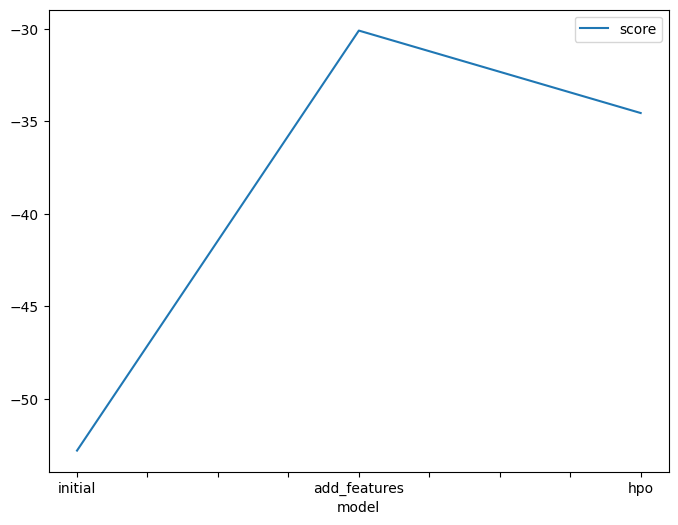

In [34]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-52.804756, -30.081911, -34.542211]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

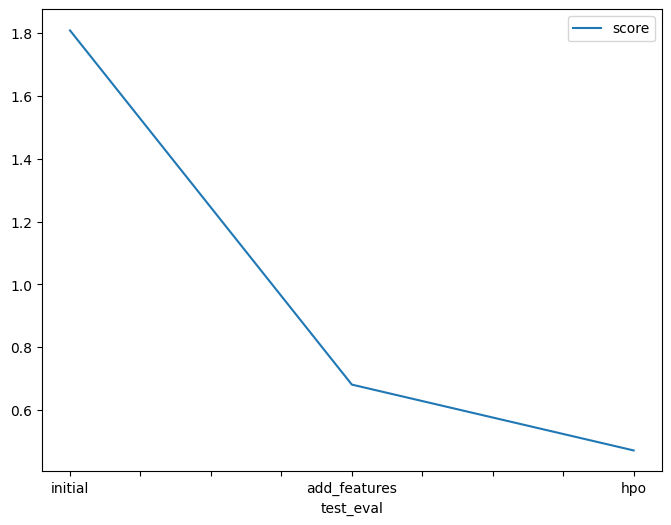

In [35]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.80761, 0.68155, 0.47222]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')